# This notebook:

-imports Legacy photometry and PanSTARRS photometry

-uses potential galaxies (magnitude >=14 to exclude stars) in speciffied bands (g, r, z) to observe if there is any bias (if it follows y=x or not)

-calculates percentiles for the difference between Legacy and PanSTARRS bands


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord

# read in list of transients/variables, then export a file to be crossmatched with Legacy
transients = pd.read_csv("/Users/allisonblum/NRAO/WISE/E3.1 transients and variables - Transients and variables.csv",skiprows=[0,1,2,3,5])
transients.rename(columns={'RA':'ra','Dec':'dec','Name':'id'}, inplace = True)
transients[["id","ra","dec"]]
transients.to_csv('/Users/allisonblum/NRAO/Legacy/Legacy_originalsources.csv', index=False)

In [119]:
# output from Legacy crossmatch
Legacy = pd.read_csv("/Users/allisonblum/NRAO/Legacy/original_results.txt")
Legacy

,t1_id,t1_ra,t1_dec,dec,dered_flux_w1,dered_flux_w2,dered_flux_w3,dered_flux_z,dered_mag_g,dered_mag_r,...,ra,snr_g,snr_r,snr_w1,snr_w2,snr_w3,snr_z,w1_w2,w2_w3,dist_arcsec
0,VT_J023346-010128_T10t04,38.445561,-1.024548,-1.024548,1.191883e+02,71.318160,97.559960,1.906627e+02,17.545527,17.111591,...,38.445558,1172.085000,1475.717700,143.591320,49.559513,3.768494,1194.202100,-0.555429,0.342878,0.011349
1,VT_J222546-075604_T09t34,336.442597,-7.934644,-7.934562,4.946235e+01,40.633957,216.210390,1.129312e+01,23.041315,21.266697,...,336.442631,18.490168,46.562930,71.428770,28.186659,6.024945,90.018260,-0.209909,1.819420,0.318980
2,VT_J121541+723303_T28t07,183.922640,72.551053,72.551089,2.001871e+06,786609.600000,344244.400000,7.927449e+06,6.575833,5.666290,...,183.922751,0.000000,0.000000,6069.643000,1172.658800,14531.508000,0.000000,-1.013057,-0.895810,0.176473
3,VT_J145859+204345_T16t20,224.748983,20.729240,20.729812,2.930454e+00,-10.572402,99.472480,7.826176e+00,22.317396,21.101154,...,224.748762,16.448440,28.746212,3.779952,-7.267024,4.254027,24.992083,NaN,NaN,2.190740
4,VT_J145859+204345_T16t20,224.748983,20.729240,20.728707,4.164855e+00,-7.168747,120.462720,6.795736e+00,21.816061,21.307285,...,224.749040,31.050438,28.642004,5.490133,-5.033171,5.309831,27.761639,NaN,NaN,1.926640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,VT_J163627+275222_T17t23,249.115594,27.873001,27.872950,7.458948e+01,46.167380,66.599740,1.841653e+01,22.391102,20.797680,...,249.115657,24.476992,50.822388,105.546660,40.629520,2.326052,101.321080,-0.516645,0.403114,0.272917
1125,VT_J171043+382803_T20t22,257.681605,38.467625,38.467134,4.389748e+02,348.767600,2527.662600,6.915880e+01,18.816034,18.127094,...,257.681601,232.132950,330.069270,315.044250,182.389270,113.673935,348.560180,-0.245994,2.155170,1.768269
1126,VT_J171043+382803_T20t22,257.681605,38.467625,38.467327,7.075439e+02,415.812470,5879.393600,2.102102e+03,15.699167,14.844345,...,257.681925,1003.902470,1349.228000,267.562870,109.910194,125.263855,1643.313400,-0.573375,2.880801,1.399066
1127,VT_J174701+554421_T24t18,266.758176,55.739362,55.739343,3.572047e+01,23.592580,54.616690,9.121571e+00,23.784603,21.955858,...,266.757770,7.168785,19.567848,71.498690,29.192787,2.746218,66.493250,-0.447021,0.915548,0.824721


In [120]:
# output from PanSTARRS crossmatch
PanSTARRS = pd.read_csv("/Users/allisonblum/NRAO/PanSTARRS-1/PanSTARRS-1_DR2_Output.csv")
PanSTARRS

,_ra_,_dec_,_searchID_,MatchID,MatchRA,MatchDEC,dstArcSec,objName,objAltName1,objAltName2,...,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags
0,38.445561,-1.024548,2,106770384455190982,38.445562,-1.024549,0.003664,PSO J038.4456-01.0245,-999,-999,...,17.558399,16.878700,0.021018,0.066420,10,16.975300,0.012990,0.044136,10,16892216
1,265.796139,56.192208,1647,175432657962111337,265.796134,56.192209,0.009594,PSO J265.7961+56.1922,-999,-999,...,-999.000000,-999.000000,-999.000000,-999.000000,0,-999.000000,-999.000000,-999.000000,0,16416
2,342.681794,8.768344,31,118523426818252370,342.681797,8.768342,0.014477,PSO J342.6818+08.7683,-999,-999,...,18.462799,17.757099,0.030439,0.090573,14,17.812599,0.021924,0.085672,14,16892216
3,159.191078,59.169585,573,179001591910034247,159.191082,59.169590,0.016515,PSO J159.1911+59.1696,-999,-999,...,20.031900,19.403799,0.178032,0.293420,3,19.450300,0.182741,0.272065,3,115000
4,351.198873,61.187431,0,181423511988865624,351.198872,61.187437,0.020566,PSO J351.1989+61.1874,-999,-999,...,15.389700,15.432700,0.004565,0.018603,10,15.344500,0.002719,0.007836,10,115000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,164.711697,-1.983616,75,105621647120850044,164.711967,-1.983675,0.991948,PSO J164.7120-01.9837,-999,-999,...,-999.000000,-999.000000,-999.000000,-999.000000,0,-999.000000,-999.000000,-999.000000,0,0
1123,200.375002,27.794562,1465,141352003747054176,200.374705,27.794649,0.994591,PSO J200.3747+27.7946,-999,-999,...,-999.000000,-999.000000,-999.000000,-999.000000,0,-999.000000,-999.000000,-999.000000,0,0
1124,345.024805,69.837728,849,191803450245775733,345.024612,69.837459,0.995264,PSO J345.0246+69.8375,-999,-999,...,18.719601,18.728001,0.043496,0.203665,11,18.615200,0.037180,0.165898,11,115000
1125,197.062048,21.138492,191,133361970622646979,197.062262,21.138683,0.997454,PSO J197.0623+21.1387,-999,-999,...,19.723301,19.747299,0.269477,-999.000000,1,19.747101,0.182688,-999.000000,1,536


In [116]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_g = PanSTARRS[PanSTARRS['gMeanPSFMag'] >= 14]
PanSTARRS_comparison_g = PanSTARRS_corrected_g[["_ra_","_dec_","gMeanPSFMag", "rMeanPSFMag","zMeanPSFMag"]]
Legacy_PS_comparison = Legacy[["ra","dec","mag_g","mag_r","mag_z"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra = PanSTARRS_comparison_g['_ra_']
pdec = PanSTARRS_comparison_g['_dec_']
pcat = SkyCoord(ra = pra * u.degree, dec = pdec * u.degree)
lra = Legacy_PS_comparison['ra']
ldec = Legacy_PS_comparison['dec']
lcat = SkyCoord(ra = lra * u.degree, dec = ldec * u.degree)
idx, d2d, d3d = pcat.match_to_catalog_sky(lcat)
matches = idx[np.where(d2d < 1 * u.arcsec)]
Legacy_matching=Legacy_PS_comparison.iloc[matches]
PanSTARRS_matching=PanSTARRS_comparison_g.iloc[np.where(d2d < 1 * u.arcsec)]

# match the indicies of the newly created tables (This is necessary if a results table of concatted results is wanted)
Legacy_matching.reset_index(inplace=True)
PanSTARRS_matching.reset_index(inplace=True)


Text(0, 0.5, 'Legacy g-band')

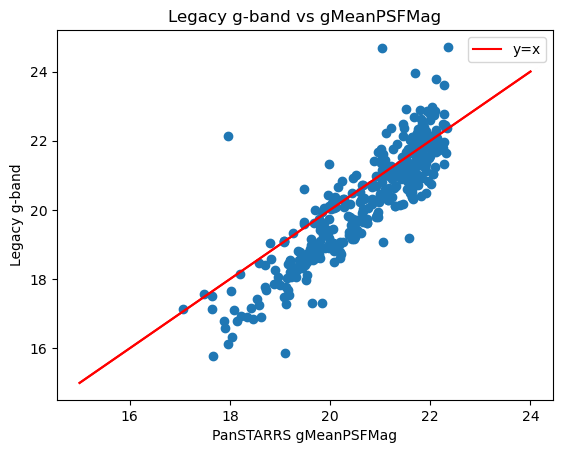

In [121]:
# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching['gMeanPSFMag'], Legacy_matching['mag_g'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r")
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('Legacy g-band vs gMeanPSFMag')
plt.xlabel('PanSTARRS gMeanPSFMag')
plt.ylabel('Legacy g-band')

Text(0, 0.5, 'Legacy r-band')

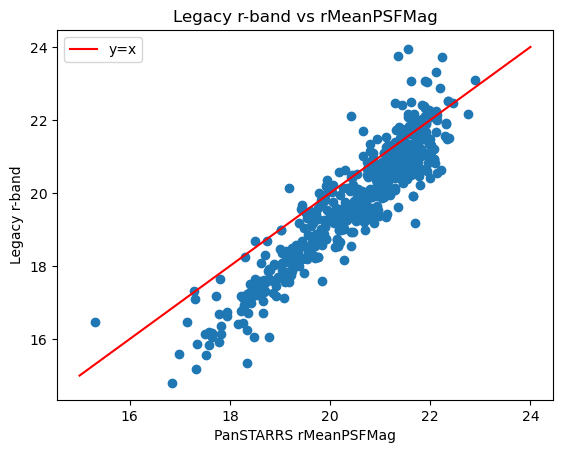

In [113]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_r = PanSTARRS[PanSTARRS['rMeanPSFMag'] >= 14]
PanSTARRS_comparison_r = PanSTARRS_corrected_r[["_ra_","_dec_","gMeanPSFMag", "rMeanPSFMag","zMeanPSFMag"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra_r = PanSTARRS_comparison_r['_ra_']
pdec_r = PanSTARRS_comparison_r['_dec_']
pcat_r = SkyCoord(ra = pra_r * u.degree, dec = pdec_r * u.degree)
lra_r = Legacy_PS_comparison['ra']
ldec_r = Legacy_PS_comparison['dec']
lcat_r = SkyCoord(ra = lra_r * u.degree, dec = ldec_r * u.degree)
idx_r, d2d_r, d3d_r = pcat_r.match_to_catalog_sky(lcat_r)
matches = idx_r[np.where(d2d_r < 1 * u.arcsec)]
Legacy_matching_r=Legacy_PS_comparison.iloc[matches]
PanSTARRS_matching_r=PanSTARRS_comparison_r.iloc[np.where(d2d_r < 1 * u.arcsec)]

# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching_r['rMeanPSFMag'], Legacy_matching_r['mag_r'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('Legacy r-band vs rMeanPSFMag')
plt.xlabel('PanSTARRS rMeanPSFMag')
plt.ylabel('Legacy r-band')


zMeanPSF compared to Legacy z band

Text(0, 0.5, 'Legacy z-band')

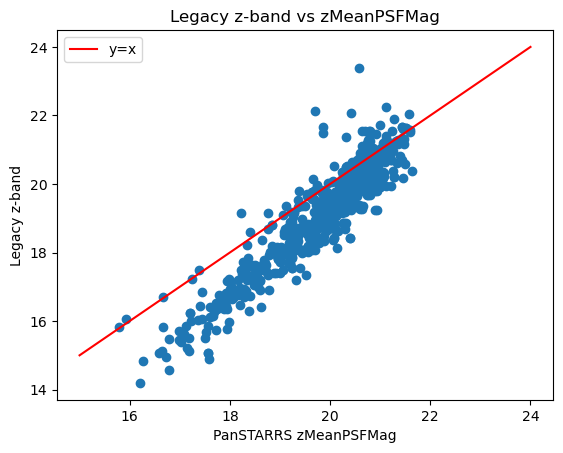

In [110]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_z = PanSTARRS[PanSTARRS['zMeanPSFMag'] >= 14]
PanSTARRS_comparison_z = PanSTARRS_corrected_z[["_ra_","_dec_","gMeanPSFMag", "rMeanPSFMag","zMeanPSFMag"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra_z = PanSTARRS_comparison_z['_ra_']
pdec_z = PanSTARRS_comparison_z['_dec_']
pcat_z = SkyCoord(ra = pra_z * u.degree, dec = pdec_z * u.degree)
lra_z = Legacy_PS_comparison['ra']
ldec_z = Legacy_PS_comparison['dec']
lcat_z = SkyCoord(ra = lra_z * u.degree, dec = ldec_z * u.degree)
idx_z, d2d_z, d3d_z = pcat_z.match_to_catalog_sky(lcat_z)
matches = idx_z[np.where(d2d_z < 1 * u.arcsec)]
Legacy_matching_z=Legacy_PS_comparison.iloc[matches]
PanSTARRS_matching_z=PanSTARRS_comparison_z.iloc[np.where(d2d_z < 1 * u.arcsec)]

# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching_z['zMeanPSFMag'], Legacy_matching_z['mag_z'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('Legacy z-band vs zMeanPSFMag')
plt.xlabel('PanSTARRS zMeanPSFMag')
plt.ylabel('Legacy z-band')


Text(0, 0.5, 'Legacy g-band')

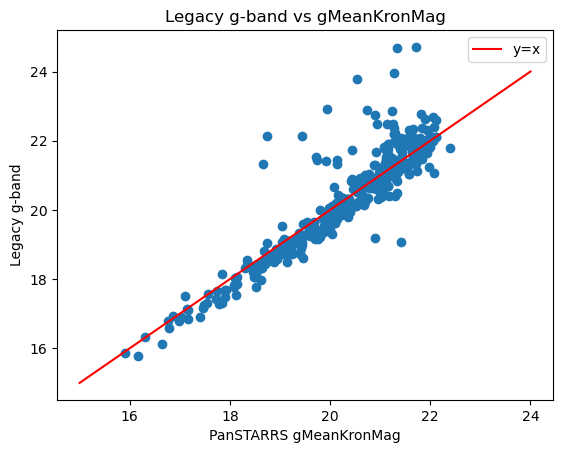

In [111]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_g_kron = PanSTARRS[PanSTARRS['gMeanKronMag'] >= 14]
PanSTARRS_comparison_g_kron = PanSTARRS_corrected_g_kron[["_ra_","_dec_","gMeanKronMag", "rMeanKronMag","zMeanKronMag"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra_g_kron = PanSTARRS_comparison_g_kron['_ra_']
pdec_g_kron = PanSTARRS_comparison_g_kron['_dec_']
pcat_g_kron = SkyCoord(ra = pra_g_kron * u.degree, dec = pdec_g_kron * u.degree)
lra_g_kron = Legacy_PS_comparison['ra']
ldec_g_kron = Legacy_PS_comparison['dec']
lcat_g_kron = SkyCoord(ra = lra_g_kron * u.degree, dec = ldec_g_kron * u.degree)
idx_g_kron, d2d_g_kron, d3d_g_kron = pcat_g_kron.match_to_catalog_sky(lcat_g_kron)
matches_g_kron = idx_g_kron[np.where(d2d_g_kron < 1 * u.arcsec)]
Legacy_matching_g_kron=Legacy_PS_comparison.iloc[matches_g_kron]
PanSTARRS_matching_g_kron=PanSTARRS_comparison_g_kron.iloc[np.where(d2d_g_kron < 1 * u.arcsec)]

# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching_g_kron['gMeanKronMag'], Legacy_matching_g_kron['mag_g'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('Legacy g-band vs gMeanKronMag')
plt.xlabel('PanSTARRS gMeanKronMag')
plt.ylabel('Legacy g-band')

Text(0, 0.5, 'Legacy r-band')

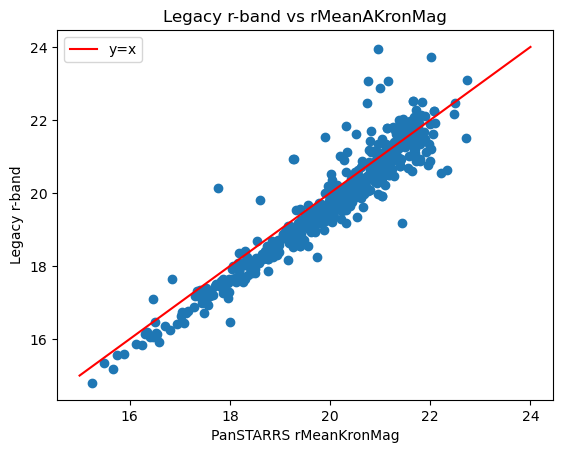

In [108]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_r_kron = PanSTARRS[PanSTARRS['rMeanKronMag'] >= 14]
PanSTARRS_comparison_r_kron = PanSTARRS_corrected_r_kron[["_ra_","_dec_","gMeanKronMag", "rMeanKronMag","zMeanKronMag"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra_r_kron = PanSTARRS_comparison_r_kron['_ra_']
pdec_r_kron = PanSTARRS_comparison_r_kron['_dec_']
pcat_r_kron = SkyCoord(ra = pra_r_kron * u.degree, dec = pdec_r_kron * u.degree)
lra_r_kron = Legacy_PS_comparison['ra']
ldec_r_kron = Legacy_PS_comparison['dec']
lcat_r_kron = SkyCoord(ra = lra_r_kron * u.degree, dec = ldec_r_kron * u.degree)
idx_r_kron, d2d_r_kron, d3d_r_kron = pcat_r_kron.match_to_catalog_sky(lcat_r_kron)
matches_r_kron = idx_r_kron[np.where(d2d_r_kron < 1 * u.arcsec)]
Legacy_matching_r_kron=Legacy_PS_comparison.iloc[matches_r_kron]
PanSTARRS_matching_r_kron=PanSTARRS_comparison_r_kron.iloc[np.where(d2d_r_kron < 1 * u.arcsec)]

# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching_r_kron['rMeanKronMag'], Legacy_matching_r_kron['mag_r'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('Legacy r-band vs rMeanAKronMag')
plt.xlabel('PanSTARRS rMeanKronMag')
plt.ylabel('Legacy r-band')

Text(0, 0.5, 'Legacy z-band')

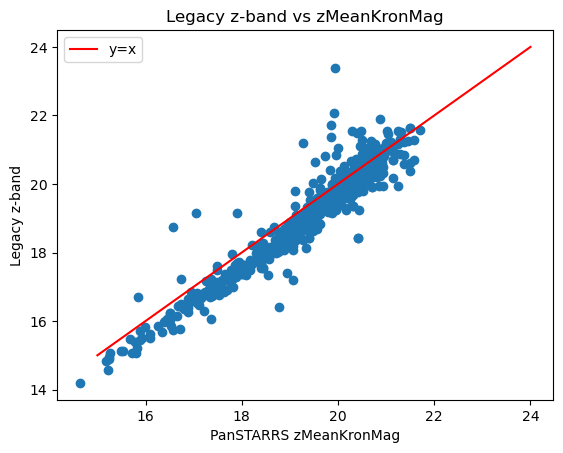

In [112]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_z_kron = PanSTARRS[PanSTARRS['zMeanKronMag'] >= 14]
PanSTARRS_comparison_z_kron = PanSTARRS_corrected_z_kron[["_ra_","_dec_","gMeanKronMag", "rMeanKronMag","zMeanKronMag"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra_z_kron = PanSTARRS_comparison_z_kron['_ra_']
pdec_z_kron = PanSTARRS_comparison_z_kron['_dec_']
pcat_z_kron = SkyCoord(ra = pra_z_kron * u.degree, dec = pdec_z_kron * u.degree)
lra_z_kron = Legacy_PS_comparison['ra']
ldec_z_kron = Legacy_PS_comparison['dec']
lcat_z_kron = SkyCoord(ra = lra_z_kron * u.degree, dec = ldec_z_kron * u.degree)
idx_z_kron, d2d_z_kron, d3d_z_kron = pcat_z_kron.match_to_catalog_sky(lcat_z_kron)
matches_z_kron = idx_z_kron[np.where(d2d_z_kron < 1 * u.arcsec)]
Legacy_matching_z_kron=Legacy_PS_comparison.iloc[matches_z_kron]
PanSTARRS_matching_z_kron=PanSTARRS_comparison_z_kron.iloc[np.where(d2d_z_kron < 1 * u.arcsec)]

# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching_z_kron['zMeanKronMag'], Legacy_matching_z_kron['mag_z'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('Legacy z-band vs zMeanKronMag')
plt.xlabel('PanSTARRS zMeanKronMag')
plt.ylabel('Legacy z-band')

Text(0, 0.5, 'Legacy g-band')

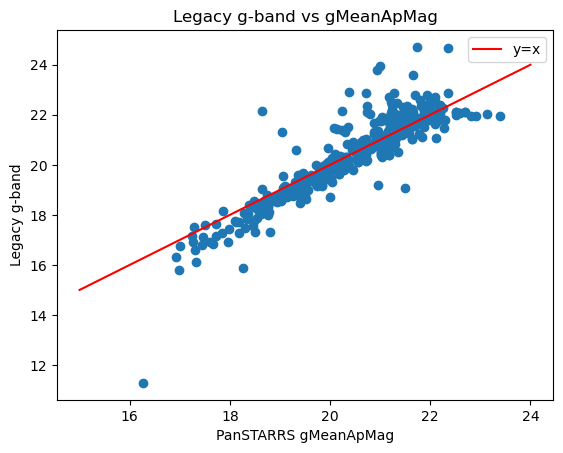

In [106]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_g_ap = PanSTARRS[PanSTARRS['gMeanApMag'] >= 14]
PanSTARRS_comparison_g_ap = PanSTARRS_corrected_g_ap[["_ra_","_dec_","gMeanApMag", "rMeanApMag","zMeanApMag"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra_g_ap = PanSTARRS_comparison_g_ap['_ra_']
pdec_g_ap = PanSTARRS_comparison_g_ap['_dec_']
pcat_g_ap = SkyCoord(ra = pra_g_ap * u.degree, dec = pdec_g_ap * u.degree)
lra_g_ap = Legacy_PS_comparison['ra']
ldec_g_ap = Legacy_PS_comparison['dec']
lcat_g_ap = SkyCoord(ra = lra_g_ap * u.degree, dec = ldec_g_ap * u.degree)
idx_g_ap, d2d_g_ap, d3d_g_ap = pcat_g_ap.match_to_catalog_sky(lcat_g_ap)
matches_g_ap = idx_g_ap[np.where(d2d_g_ap < 1 * u.arcsec)]
Legacy_matching_g_ap=Legacy_PS_comparison.iloc[matches_g_ap]
PanSTARRS_matching_g_ap=PanSTARRS_comparison_g_ap.iloc[np.where(d2d_g_ap < 1 * u.arcsec)]

# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching_g_ap['gMeanApMag'], Legacy_matching_g_ap['mag_g'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('Legacy g-band vs gMeanApMag')
plt.xlabel('PanSTARRS gMeanApMag')
plt.ylabel('Legacy g-band')

Text(0, 0.5, 'Legacy r-band')

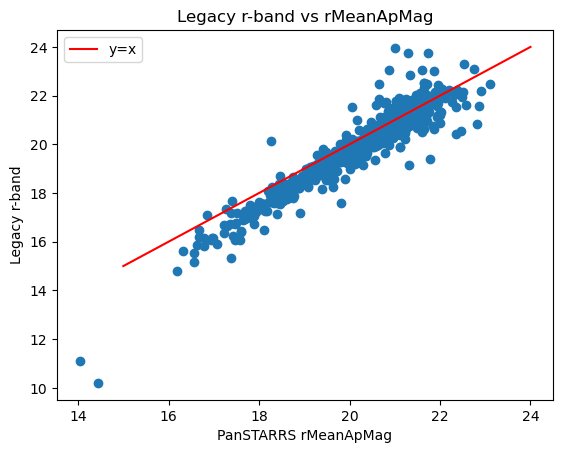

In [105]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_r_ap = PanSTARRS[PanSTARRS['rMeanApMag'] >= 14]
PanSTARRS_comparison_r_ap = PanSTARRS_corrected_r_ap[["_ra_","_dec_","gMeanApMag", "rMeanApMag","zMeanApMag"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra_r_ap = PanSTARRS_comparison_r_ap['_ra_']
pdec_r_ap = PanSTARRS_comparison_r_ap['_dec_']
pcat_r_ap = SkyCoord(ra = pra_r_ap * u.degree, dec = pdec_r_ap * u.degree)
lra_r_ap = Legacy_PS_comparison['ra']
ldec_r_ap = Legacy_PS_comparison['dec']
lcat_r_ap = SkyCoord(ra = lra_r_ap * u.degree, dec = ldec_r_ap * u.degree)
idx_r_ap, d2d_r_ap, d3d_r_ap = pcat_r_ap.match_to_catalog_sky(lcat_r_ap)
matches_r_ap = idx_r_ap[np.where(d2d_r_ap < 1 * u.arcsec)]
Legacy_matching_r_ap=Legacy_PS_comparison.iloc[matches_r_ap]
PanSTARRS_matching_r_ap=PanSTARRS_comparison_r_ap.iloc[np.where(d2d_r_ap < 1 * u.arcsec)]

# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching_r_ap['rMeanApMag'], Legacy_matching_r_ap['mag_r'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = "y=x")
plt.legend()
plt.title('Legacy r-band vs rMeanApMag')
plt.xlabel('PanSTARRS rMeanApMag')
plt.ylabel('Legacy r-band')

Text(0, 0.5, 'Legacy z-band')

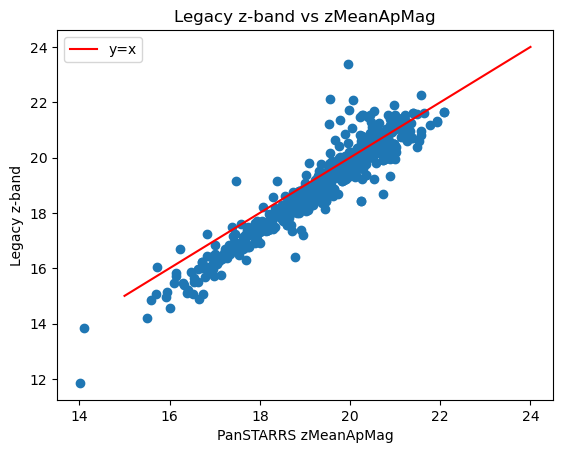

In [98]:
# take out any stars, over saturation, or bad detections (such as -999)
PanSTARRS_corrected_z_ap = PanSTARRS[PanSTARRS['zMeanApMag'] >= 14]
PanSTARRS_comparison_z_ap = PanSTARRS_corrected_z_ap[["_ra_","_dec_","gMeanApMag", "rMeanApMag","zMeanApMag"]]

# match sky coordinates between PanSTARRS and Legacy to get all photometry for each individual source
pra_z_ap = PanSTARRS_comparison_z_ap['_ra_']
pdec_z_ap = PanSTARRS_comparison_z_ap['_dec_']
pcat_z_ap = SkyCoord(ra = pra_z_ap * u.degree, dec = pdec_z_ap * u.degree)
lra_z_ap = Legacy_PS_comparison['ra']
ldec_z_ap = Legacy_PS_comparison['dec']
lcat_z_ap = SkyCoord(ra = lra_z_ap * u.degree, dec = ldec_z_ap * u.degree)
idx_z_ap, d2d_z_ap, d3d_z_ap = pcat_z_ap.match_to_catalog_sky(lcat_z_ap)
matches_z_ap = idx_z_ap[np.where(d2d_z_ap < 1 * u.arcsec)]
Legacy_matching_z_ap=Legacy_PS_comparison.iloc[matches_z_ap]
PanSTARRS_matching_z_ap=PanSTARRS_comparison_z_ap.iloc[np.where(d2d_z_ap < 1 * u.arcsec)]

# create a plot for visualization. If the trend follows the line y=x, this means that there is no bias between instruments and photometries
plt.scatter(PanSTARRS_matching_z_ap['zMeanApMag'], Legacy_matching_z_ap['mag_z'])
y_x = np.arange(15,25)
plt.plot(y_x , y_x, color= "r", label = 'y=x')
plt.legend()
plt.title('Legacy z-band vs zMeanApMag')
plt.xlabel('PanSTARRS zMeanApMag')
plt.ylabel('Legacy z-band')

Text(0, 0.5, 'PanSTARRS gMeanKronMag')

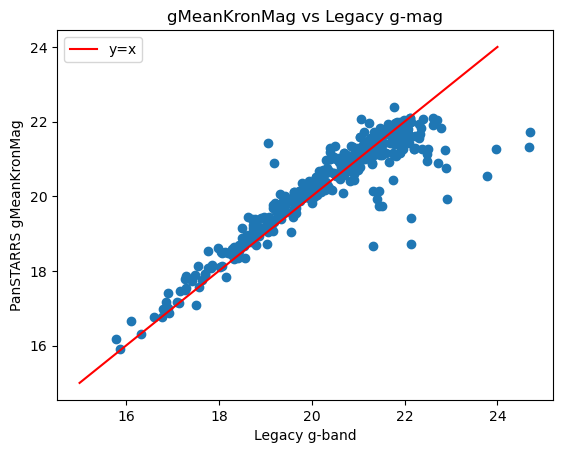

In [101]:
# continue plotting to show bias, this time switching the x and y axis to notice any differences
plt.scatter(Legacy_matching_g_kron['mag_g'], PanSTARRS_matching_g_kron['gMeanKronMag'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('gMeanKronMag vs Legacy g-mag')
plt.xlabel('Legacy g-band')
plt.ylabel('PanSTARRS gMeanKronMag')

Text(0, 0.5, 'PanSTARRS rMeanKronMag')

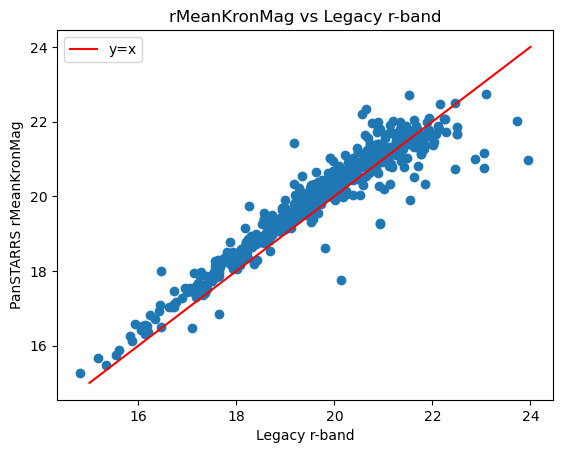

In [103]:
# continue plotting to show bias, this time switching the x and y axis to notice any differences
plt.scatter(Legacy_matching_r_kron['mag_r'], PanSTARRS_matching_r_kron['rMeanKronMag'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('rMeanKronMag vs Legacy r-band')
plt.xlabel('Legacy r-band')
plt.ylabel('PanSTARRS rMeanKronMag')

Text(0, 0.5, 'PanSTARRS zMeanKronMag')

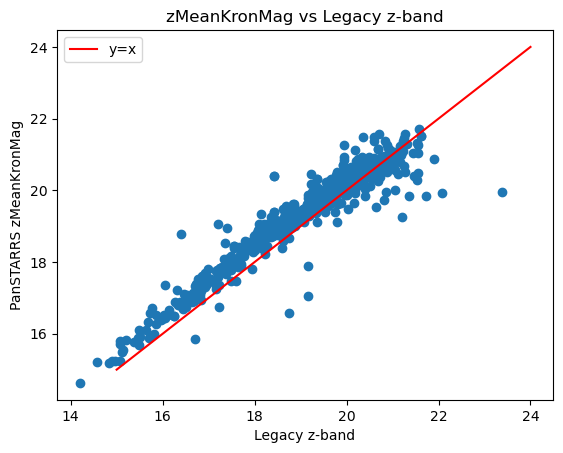

In [104]:
# continue plotting to show bias, this time switching the x and y axis to notice any differences
plt.scatter(Legacy_matching_z_kron['mag_z'], PanSTARRS_matching_z_kron['zMeanKronMag'])
y_x = np.arange(15,25)
plt.plot(y_x,y_x, color="r", label = 'y=x')
plt.legend()
plt.title('zMeanKronMag vs Legacy z-band')
plt.xlabel('Legacy z-band')
plt.ylabel('PanSTARRS zMeanKronMag')

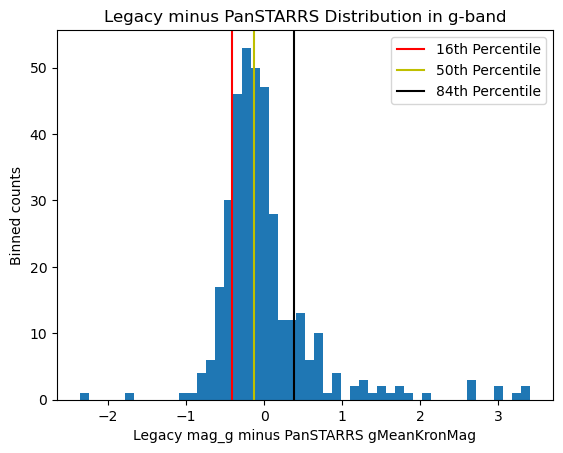

In [91]:
# create an array from Legacy and PanSTARRS photometry to subtract and get the difference
Legacy_g = Legacy_matching_g_kron['mag_g'].to_numpy()
PanSTARRS_g = PanSTARRS_matching_g_kron['gMeanKronMag'].to_numpy()
Legacy_PanSTARRS_g_difference = np.subtract(Legacy_g, PanSTARRS_g)
# take out any outliars or bad data points (inf)
Legacy_PanSTARRS_g_difference_clean = Legacy_PanSTARRS_g_difference[np.where(Legacy_PanSTARRS_g_difference <= 20)]

# find the percentiles
p16, p50, p84 = np.percentile(Legacy_PanSTARRS_g_difference_clean, [16,50,84])

# plot the difference between Legacy and PanSTARRS, with percentile lines
plt.hist(Legacy_PanSTARRS_g_difference_clean, bins=50)
plt.axvline(x=p16, ymin=0, ymax=50, color = 'red', label = "16th Percentile")
plt.axvline(x=p50, ymin=0, ymax=50, color = 'y', label = "50th Percentile")
plt.axvline(x=p84, ymin=0, ymax=50, color = 'k', label = "84th Percentile")
plt.title('Legacy minus PanSTARRS Distribution in g-band')
plt.xlabel('Legacy mag_g minus PanSTARRS gMeanKronMag')
plt.ylabel('Binned counts')
plt.legend()

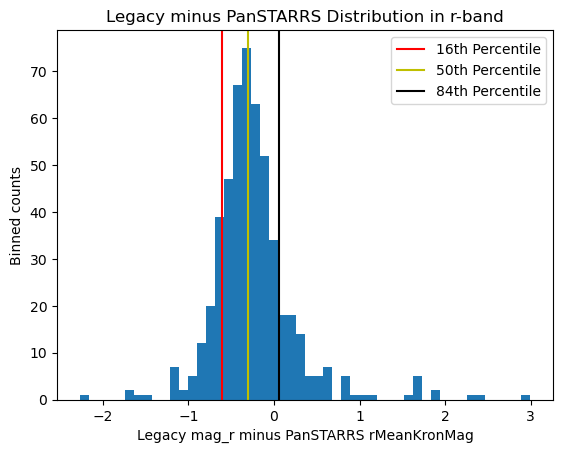

In [88]:
# create an array from Legacy and PanSTARRS photometry to subtract and get the difference
Legacy_r = Legacy_matching_r_kron['mag_r'].to_numpy()
PanSTARRS_r = PanSTARRS_matching_r_kron['rMeanKronMag'].to_numpy()
Legacy_PanSTARRS_r_difference = np.subtract(Legacy_r, PanSTARRS_r)
# take out any outliars or bad data points (inf)
Legacy_PanSTARRS_r_difference_clean = Legacy_PanSTARRS_r_difference[np.where(Legacy_PanSTARRS_r_difference <= 20)]

# find the percentiles
p16_r, p50_r, p84_r = np.percentile(Legacy_PanSTARRS_r_difference_clean, [16,50,84])

# plot the difference between Legacy and PanSTARRS, with percentile lines
plt.hist(Legacy_PanSTARRS_r_difference_clean, bins=50)
plt.axvline(x=p16_r, ymin=0, ymax=50, color = 'red', label = "16th Percentile")
plt.axvline(x=p50_r, ymin=0, ymax=50, color = 'y', label = "50th Percentile")
plt.axvline(x=p84_r, ymin=0, ymax=50, color = 'k', label = "84th Percentile")
plt.title('Legacy minus PanSTARRS Distribution in r-band')
plt.xlabel('Legacy mag_r minus PanSTARRS rMeanKronMag')
plt.ylabel('Binned counts')
plt.legend()

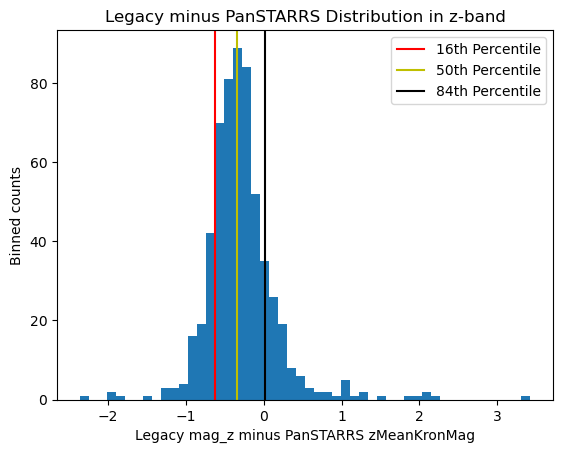

In [90]:
# create an array from Legacy and PanSTARRS photometry to subtract and get the difference
Legacy_z = Legacy_matching_z_kron['mag_z'].to_numpy()
PanSTARRS_z = PanSTARRS_matching_z_kron['zMeanKronMag'].to_numpy()
Legacy_PanSTARRS_z_difference = np.subtract(Legacy_z, PanSTARRS_z)
# take out any outliars or bad data points (inf)
Legacy_PanSTARRS_z_difference_clean = Legacy_PanSTARRS_z_difference[np.where(Legacy_PanSTARRS_z_difference <= 20)]

# find the percentiles
p16_z, p50_z, p84_z = np.percentile(Legacy_PanSTARRS_z_difference_clean, [16,50,84])

# plot the difference between Legacy and PanSTARRS, with percentile lines
plt.hist(Legacy_PanSTARRS_z_difference_clean, bins=50)
plt.axvline(x=p16_z, ymin=0, ymax=50, color = 'red', label = "16th Percentile")
plt.axvline(x=p50_z, ymin=0, ymax=50, color = 'y', label = "50th Percentile")
plt.axvline(x=p84_z, ymin=0, ymax=50, color = 'k', label = "84th Percentile")
plt.title('Legacy minus PanSTARRS Distribution in z-band')
plt.xlabel('Legacy mag_z minus PanSTARRS zMeanKronMag')
plt.ylabel('Binned counts')
plt.legend()